## <center> Analyzing Crime in Los Angeles <center>

***Refer to the crimes.csv file in the datasets folder***

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("C:/Users/uyen/Desktop/Real-World-Projects/Python/datasets/crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


**Question #1: Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.**

Text(0.5, 1.0, 'Count of Crime Occurrences Per Hour')

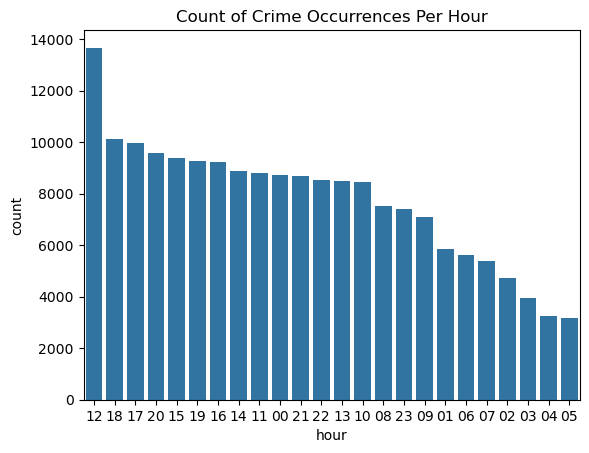

In [3]:
# find the peak crime hour

crimes["hour"] = crimes["TIME OCC"].str.slice(0,2)
crimes["hour"]

sns.countplot(data = crimes, x = "hour", order = crimes["hour"].value_counts().index)
plt.title("Count of Crime Occurrences Per Hour")

In [2]:
peak_crime_hour = 12

**Question #2: Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Central'),
  Text(1, 0, 'Hollywood'),
  Text(2, 0, '77th Street'),
  Text(3, 0, 'Southwest'),
  Text(4, 0, 'Southeast'),
  Text(5, 0, 'Newton'),
  Text(6, 0, 'Olympic'),
  Text(7, 0, 'Pacific'),
  Text(8, 0, 'Rampart'),
  Text(9, 0, 'N Hollywood'),
  Text(10, 0, 'Wilshire'),
  Text(11, 0, 'Northeast'),
  Text(12, 0, 'Van Nuys'),
  Text(13, 0, 'West Valley'),
  Text(14, 0, 'Topanga'),
  Text(15, 0, 'Mission'),
  Text(16, 0, 'Harbor'),
  Text(17, 0, 'West LA'),
  Text(18, 0, 'Devonshire'),
  Text(19, 0, 'Hollenbeck'),
  Text(20, 0, 'Foothill')])

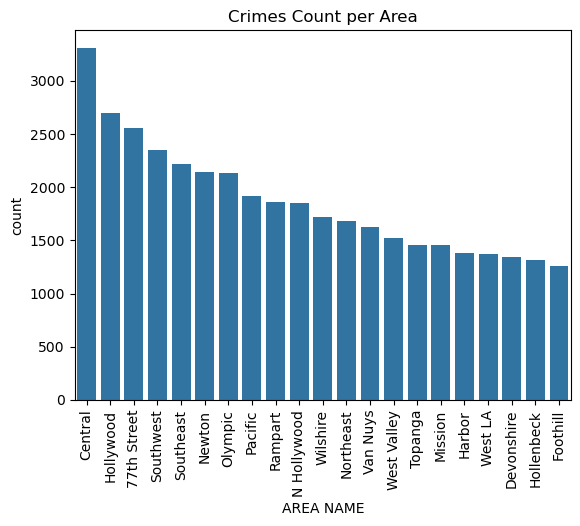

In [4]:
#filter for crimes between 10:00 PM and 3:59 AM)
crime_hour_10_359 = crimes[(crimes["TIME OCC"] >= "2200") | (crimes["TIME OCC"] < "0359")]
crime_hour_10_359

sns.countplot(data = crime_hour_10_359,x = "AREA NAME", order = crime_hour_10_359["AREA NAME"].value_counts().index)
plt.title("Crimes Count per Area")
plt.xticks(rotation = 90)

In [5]:
peak_night_crime_location = "Central"

**Question #3: Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.**

In [6]:
#create subgroups
crimes["vict_age_group"] = "None"
for index, value in crimes["Vict Age"].items():
    if value >= 0 and value <= 17:
        crimes.loc[index, "vict_age_group"] = "0-17"
    elif value >= 18 and value <= 25:
        crimes.loc[index, "vict_age_group"] = "18-25"
    elif value >= 26 and value <= 34:
        crimes.loc[index, "vict_age_group"] = "26-34"
    elif value >= 35 and value <= 44:
        crimes.loc[index, "vict_age_group"] = "35-44"
    elif value >= 45 and value <= 54:
        crimes.loc[index, "vict_age_group"] = "45-54"
    elif value >= 55 and value <= 64:
        crimes.loc[index, "vict_age_group"] = "55-64"
    else:
        crimes.loc[index, "vict_age_group"] = "65+"
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour,vict_age_group
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,06,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,09,65+


In [ ]:
victim_ages = crimes.value_counts("vict_age_group")
victim_ages


vict_age_group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64